<a href="https://colab.research.google.com/github/Arijitde24/Machine-learning/blob/main/SUPERVISED%20learning/Insurance(linear%20regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/DATASETS/insurance.csv")
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
df.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [6]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [7]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [9]:
col=list(df.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [10]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [11]:
df.isnull().sum().sum()

np.int64(52)

In [12]:
df['children']=df['children'].astype('object')

In [13]:
for i in col:
  if df[i].dtypes=="object":
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i].fillna(df[i].mean())

/tmp/ipython-input-284997018.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i]=df[i].fillna(df[i].mode()[0])


In [14]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [15]:
df.duplicated().sum()

np.int64(0)

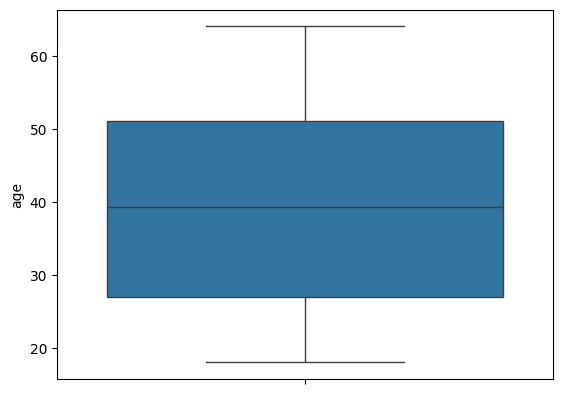

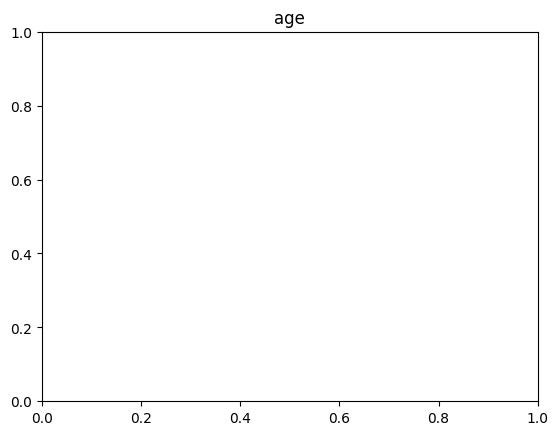

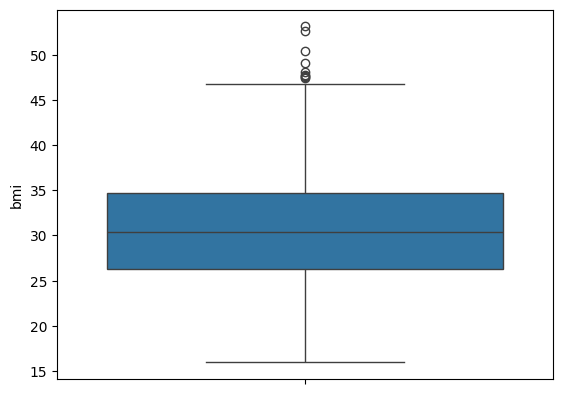

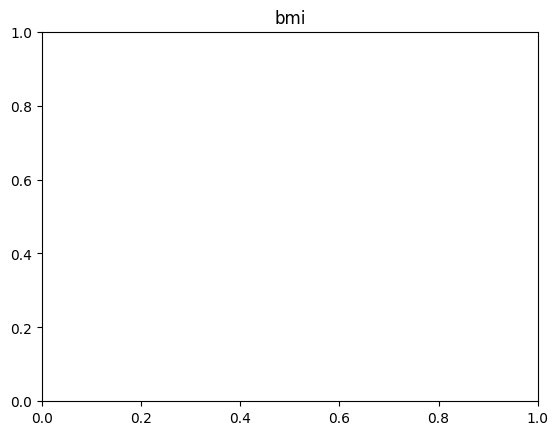

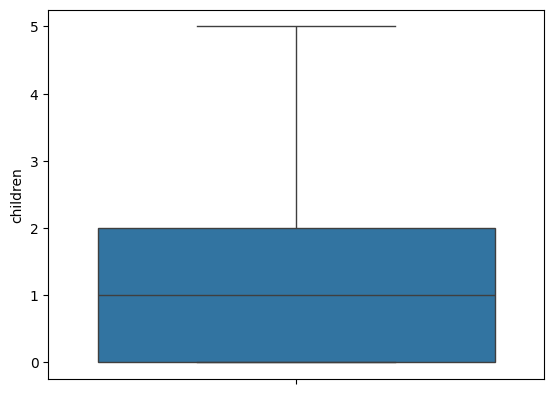

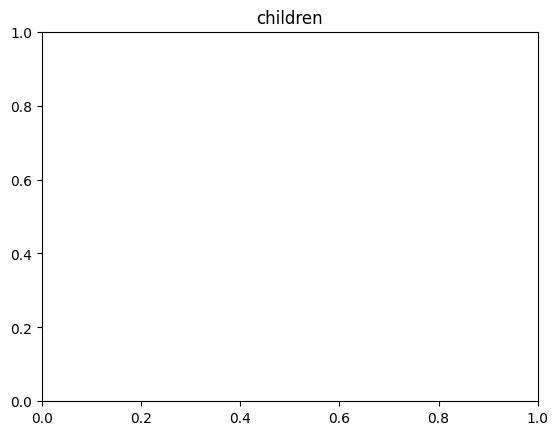

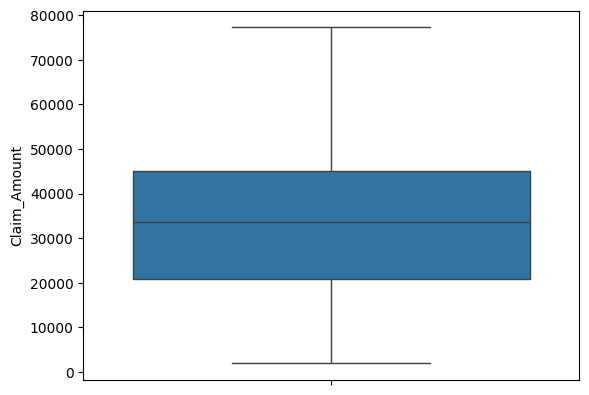

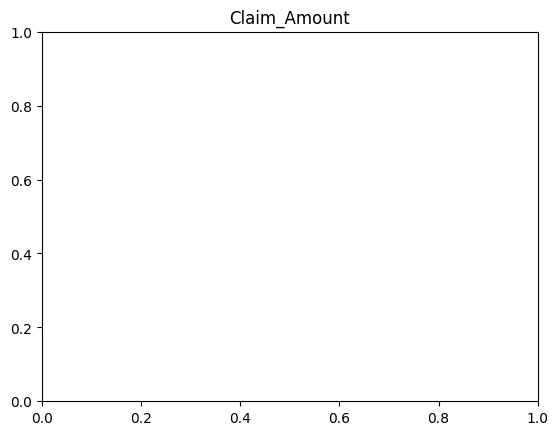

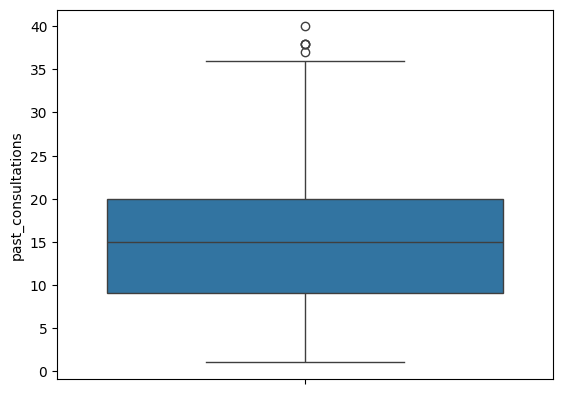

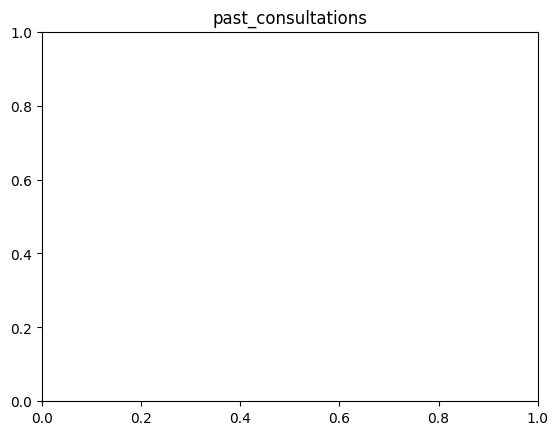

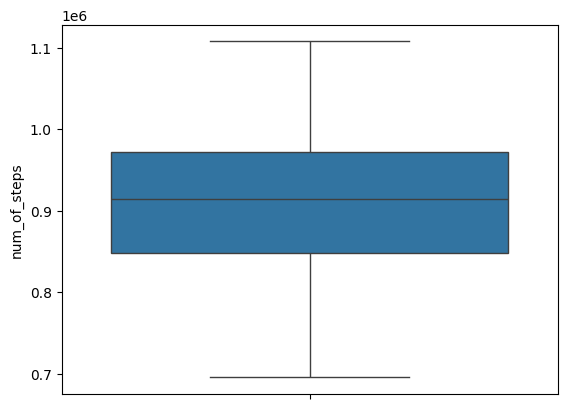

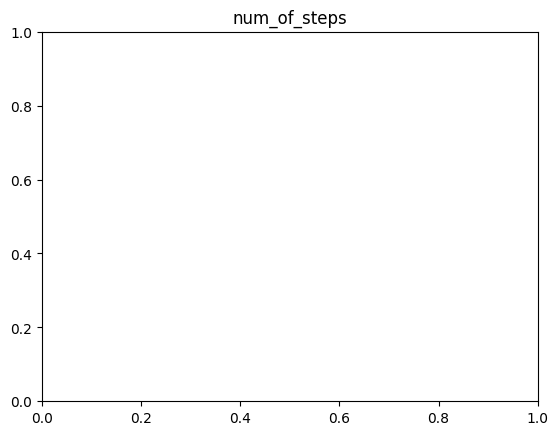

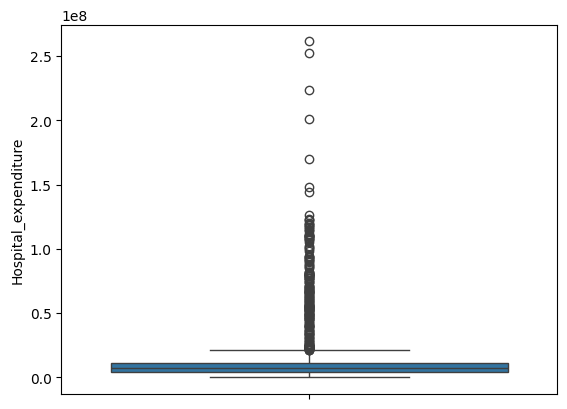

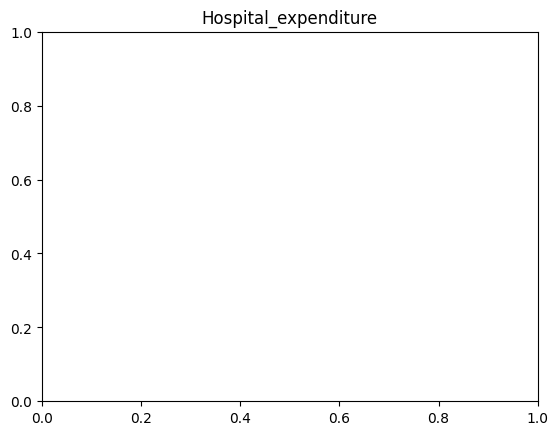

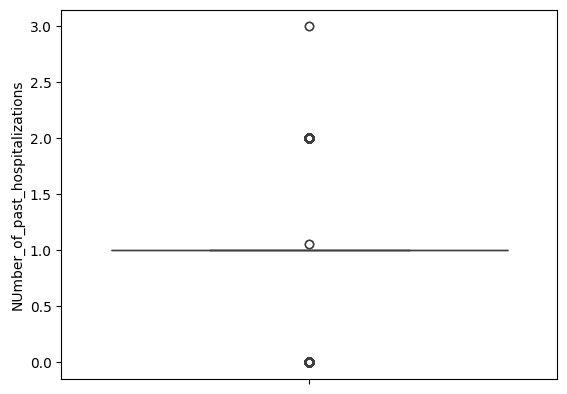

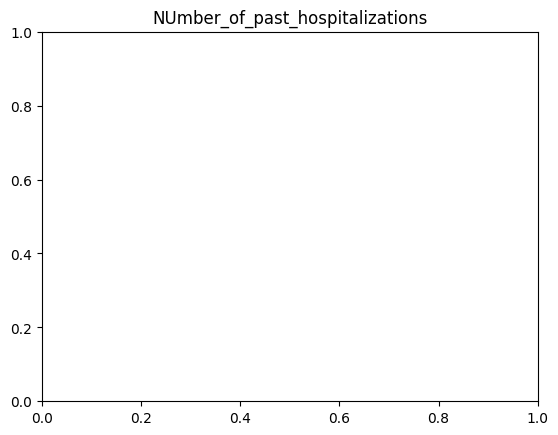

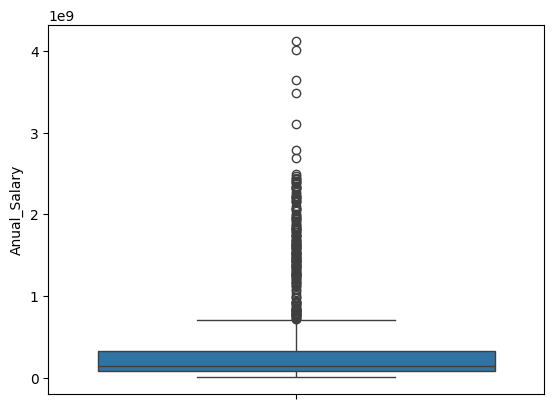

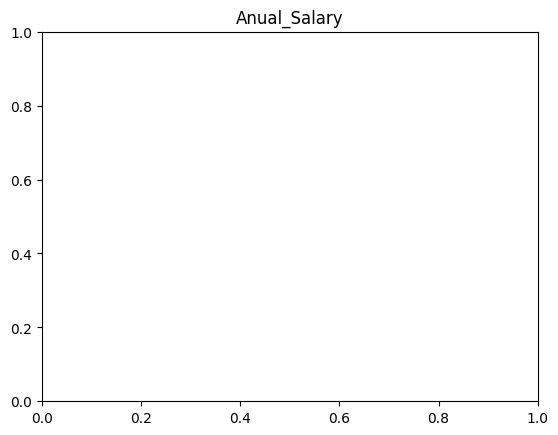

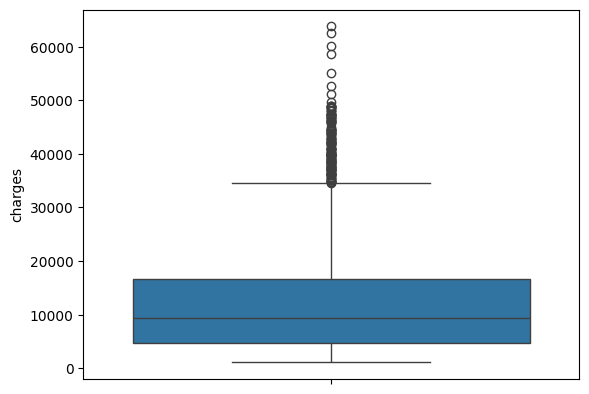

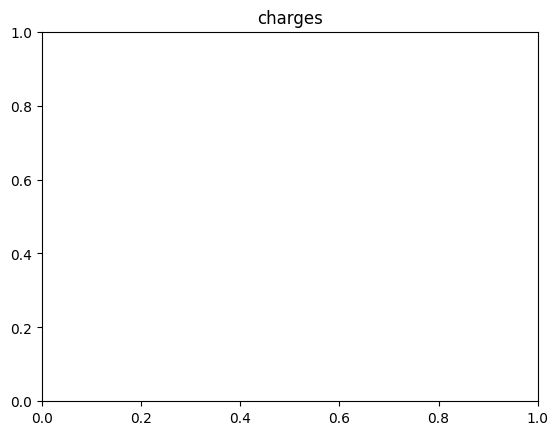

In [16]:
for i in col:
  if df[i].dtype!="object":
    sns.boxplot(df[i])
    plt.show()
    plt.title(i)
    plt.show()

In [17]:
for i in col:
  if df[i].dtype!="object":
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    upper=q3+1.5*IQR
    lower=q1-1.5*IQR
    df=df[(df[i]>=lower) & (df[i]<=upper)]


In [18]:
df.shape

(881, 13)

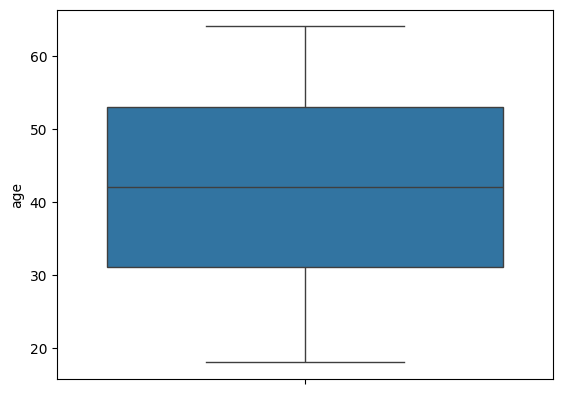

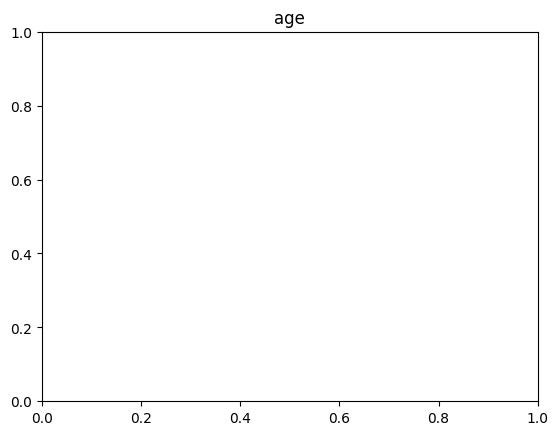

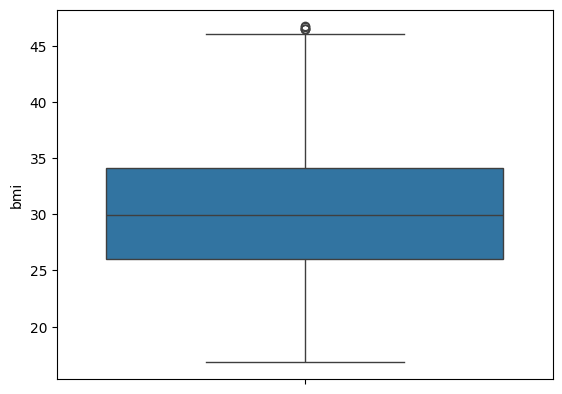

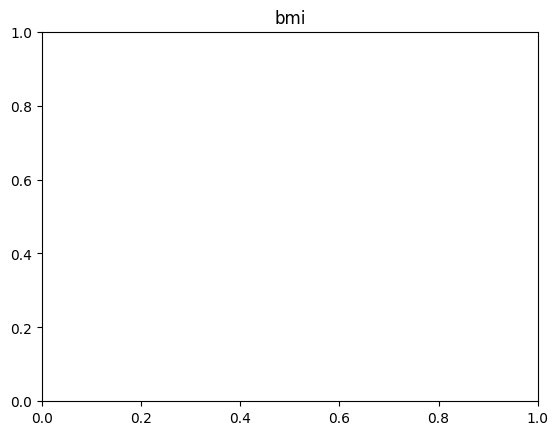

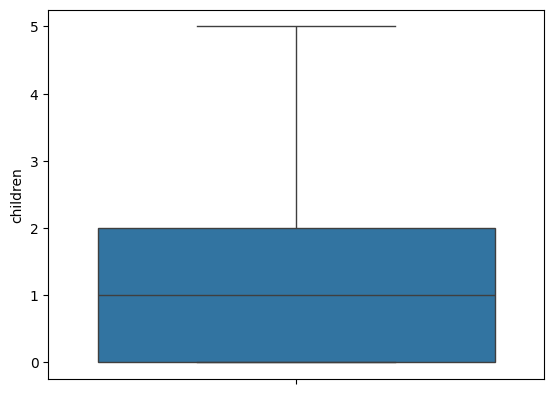

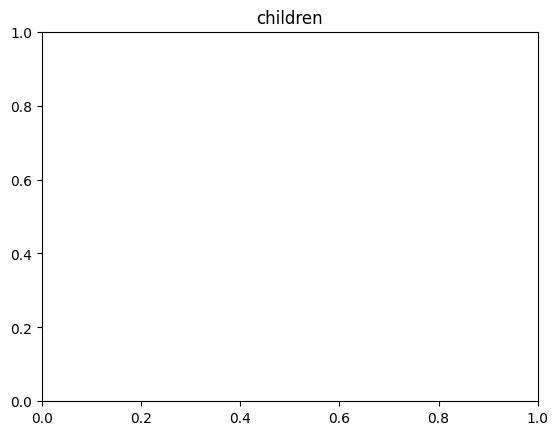

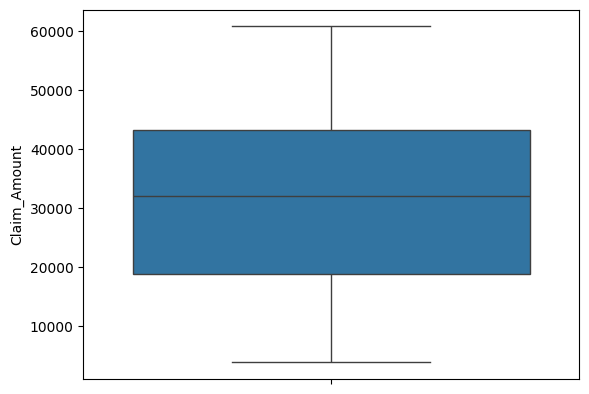

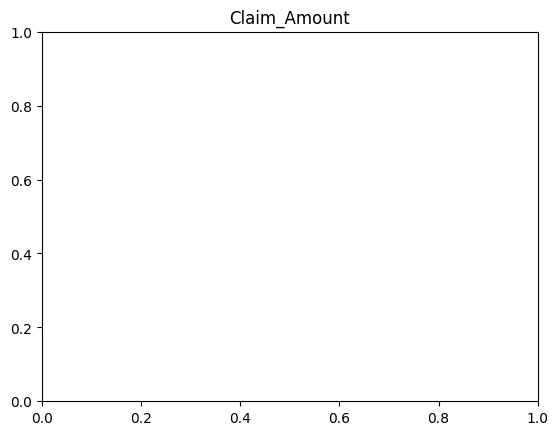

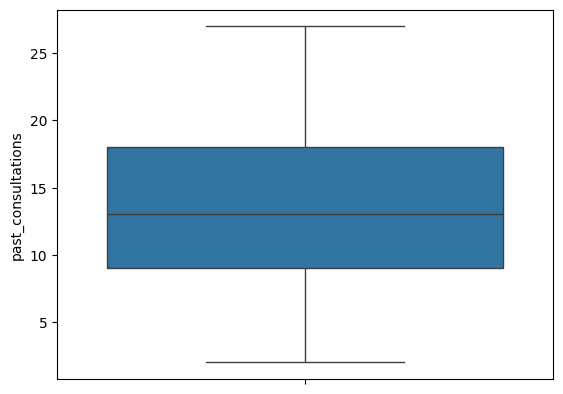

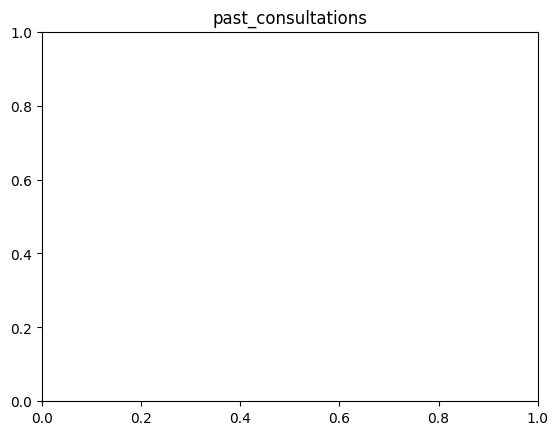

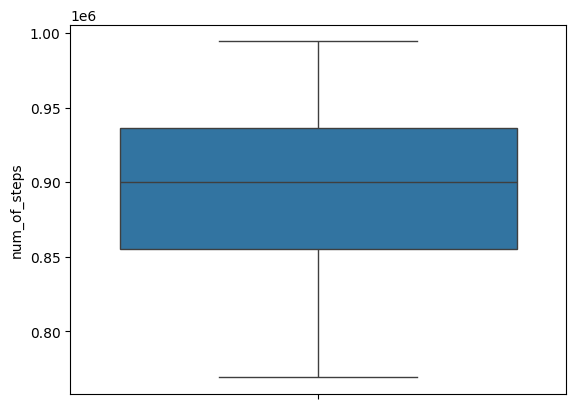

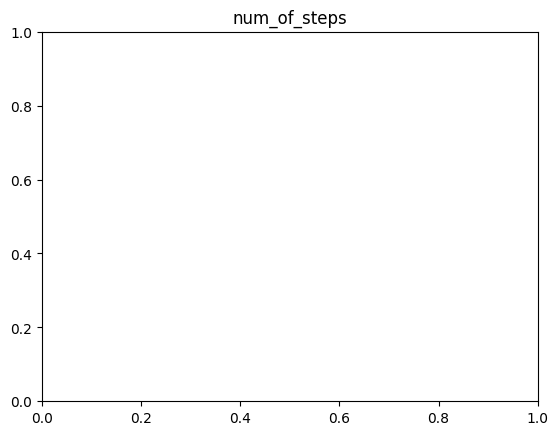

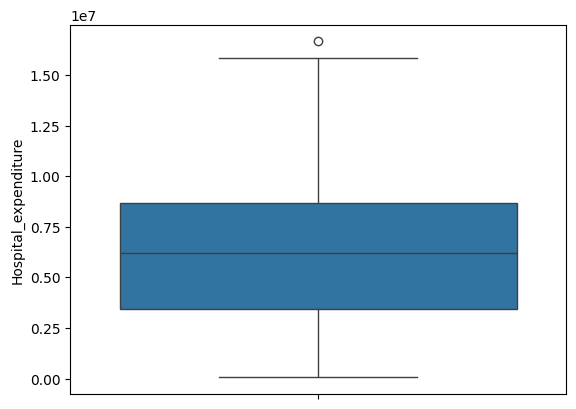

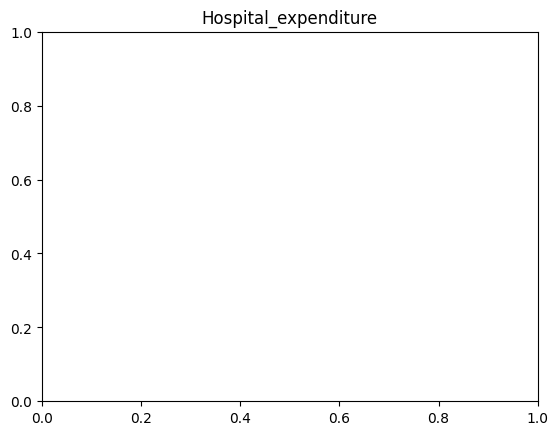

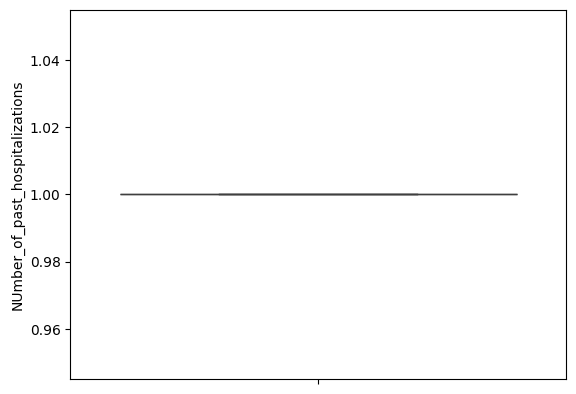

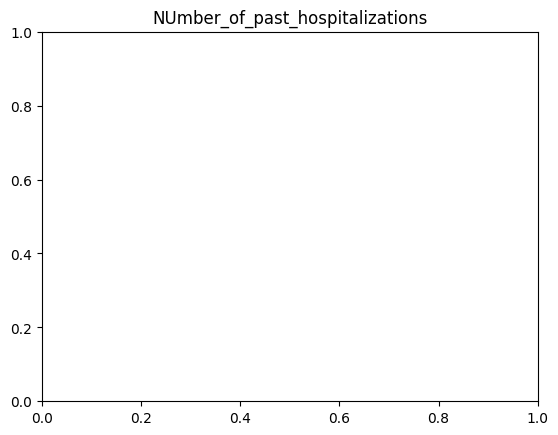

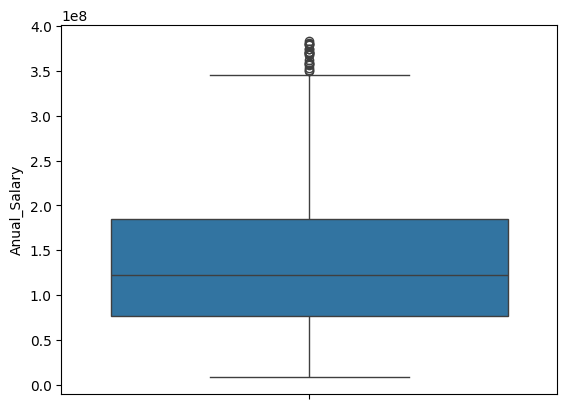

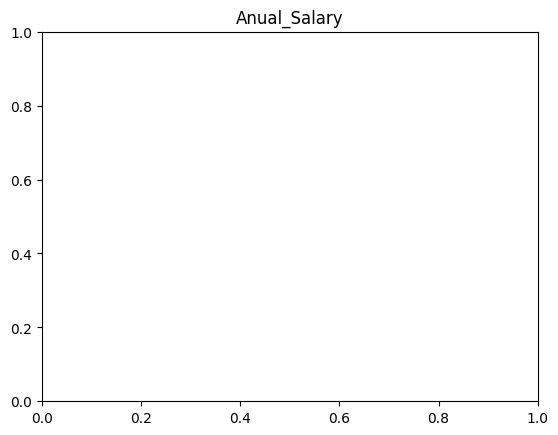

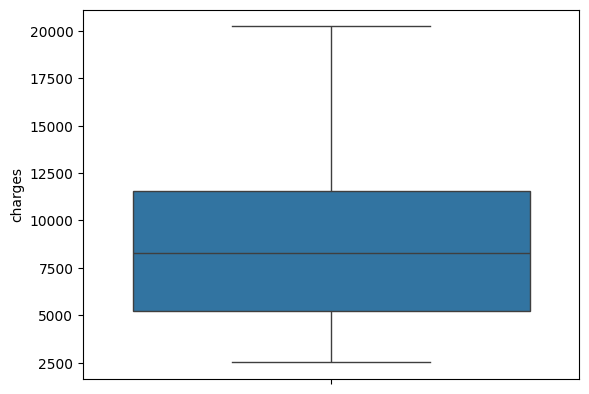

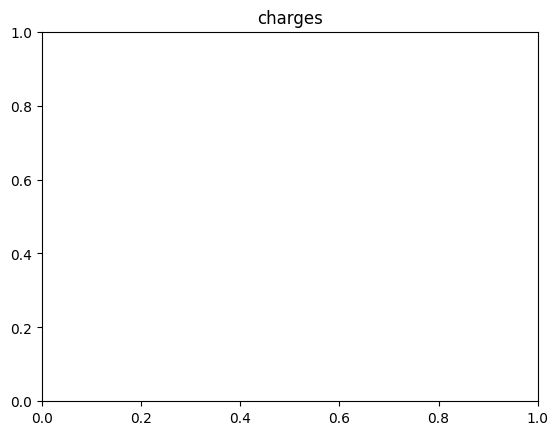

In [19]:
for i in col:
  if df[i].dtype!="object":
    sns.boxplot(df[i])
    plt.show()
    plt.title(i)
    plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()
mapping={}
for i in col:
  if df[i].dtype=="object":
    df[i]=le.fit_transform(df[i])
    mapping[i]=dict(zip(le.classes_,le.transform(le.classes_)))
for x,y in mapping.items():
  print(f"{i.upper()} \n {x} --> {y}")

CHARGES 
 sex --> {'female': np.int64(0), 'male': np.int64(1)}
CHARGES 
 smoker --> {'no': np.int64(0), 'yes': np.int64(1)}
CHARGES 
 region --> {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [22]:
df['children']

,children
151,0.0
152,0.0
153,0.0
154,2.0
155,1.0
...,...
1046,1.0
1048,3.0
1050,0.0
1062,2.0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [24]:
X=df.drop(columns=['charges'])
Y=df['charges']

In [25]:
X

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [26]:
Y

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [28]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
Y_pred=lr.predict(X_test)

In [30]:
Y_pred

array([ 7615.69949603,  5286.75234677,  9479.73819301, 11094.30301431,
        7184.80345162,  3139.369908  , 10176.74458955, 13246.91472255,
        8609.40435185, 11925.31422829, 12379.50259823, 12311.84949005,
        6145.41077022, 14987.43083353, 13587.2122159 ,  8009.48774706,
        6278.86530569,  7178.51454891,  8051.16762436, 11851.5654942 ,
        8083.73595577,  1680.5665336 ,  7628.07068622,  1752.41901376,
        6736.76942102, 12655.92927934,  7382.50572122, 14037.1676233 ,
       11588.94959966,  6998.69221237,  9642.20867392,  3308.11513495,
        7857.27726842,  5102.58399519,  8247.20284654,  5801.74760032,
        2727.09659636, 10325.39918915,  6613.62607765,  2061.80500467,
        5807.51849684,  3598.84013303, 18394.94920853,  8983.64959736,
       11776.55429883,  4944.14422479, 12817.6714312 ,  7773.57876999,
        2947.00198477, 11900.1736035 ,  6280.67376938, 15050.19876702,
        9935.73923144,  4399.02202023, 15122.48331967,  7546.29376719,
      

In [31]:
Y_test

,charges
501,6986.69700
405,5615.36900
642,8944.11510
843,11945.13270
544,7512.26700
...,...
323,4618.07990
1062,19798.05455
453,6356.27070
666,9304.70190


In [35]:
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(Y_test,Y_pred)
mape=mean_absolute_percentage_error(Y_test,Y_pred)
r2=r2_score(Y_test,Y_pred)

In [36]:
print(f"mean squared error : {mse}")
print(f"root mean squared error : {rmse}")
print(f"mean absolute error : {mae}")
print(f"mean absolute percentage error : {mape}")
print(f"r2 score : {r2}")

mean squared error : 579223.2137028571
root mean squared error : 761.0671545289923
mean absolute error : 604.7882491150227
mean absolute percentage error : 0.08980824929910045
r2 score : 0.9628809533730835
